In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark regression example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [2]:
import numpy as np

In [3]:
from scipy.stats import norm

def rnorm(n,mean,sd):
    """
    same functions as rnorm in r
    r: rnorm(n, mean=0, sd=1)
    py: rvs(loc=0, scale=1, size=1, random_state=None)
    """
    return norm.rvs(loc=mean,scale=sd,size=n)

def dnorm(x,mean,sd, log=False):
    """
    same functions as dnorm in r
    dnorm(x, mean=0, sd=1, log=FALSE)
    pdf(x, loc=0, scale=1)
    """
    if log:
        return np.log(norm.pdf(x=x,loc=mean,scale=sd))
    else:
        return norm.pdf(x=x,loc=mean,scale=sd)

def runif(n,min=0, max=1):
    """
    r: runif(n, min = 0, max = 1)
    py: random.uniform(low=0.0, high=1.0, size=None)
    """
    return np.random.uniform(min,max,size=n)
    

In [4]:
s2 = 1
t2 = 10
mu = 5
n = 5 

In [5]:
y = rnorm(n,10,1)
y

array([10.06936554,  8.65137282,  9.44823225, 11.33656507,  9.12772917])

In [6]:
# mean of the normal posterior
mu_n = (np.mean(y)*n/s2 + mu/float(t2))/(n/float(s2)+1/float(t2)) 
mu_n

9.633973501695145

In [7]:
# variance of the normal posterior
# t2.n<-1/(n/s2+1/t2)

t2_n = 1.0/(n/float(s2)+1.0/t2)
t2_n

0.19607843137254904

In [8]:
# defining the data
# y<-c(9.37, 10.18, 9.16, 11.60, 10.33)

y = [9.37, 10.18, 9.16, 11.60, 10.33]

In [9]:
mu_n = (np.mean(y)*n/s2 + mu/float(t2))/(n/float(s2)+1/float(t2)) 
mu_n

10.027450980392157

In [10]:
####metropolis part####
##S = total num of simulations
# theta<-0 ; delta<-2 ; S<-10000 ; THETA<-NULL ; set.seed(1)

theta = 0 
delta = 2

S = 10000

theta_v = []

In [11]:
for s in range(S):
    theta_star = norm.rvs(theta,np.sqrt(delta),1)
    logr = (sum(dnorm(y,theta_star,np.sqrt(s2),log=True)) +\
            sum(dnorm(theta_star,mu,np.sqrt(t2),log=True)))- \
           (sum(dnorm(y,theta,np.sqrt(s2),log=True)) + \
            sum(dnorm([theta],mu,np.sqrt(t2),log=True)))
    #print(logr)
    if np.log(runif(1))<logr:
        theta = theta_star
    #print(theta)    
    theta_v.append(theta)  

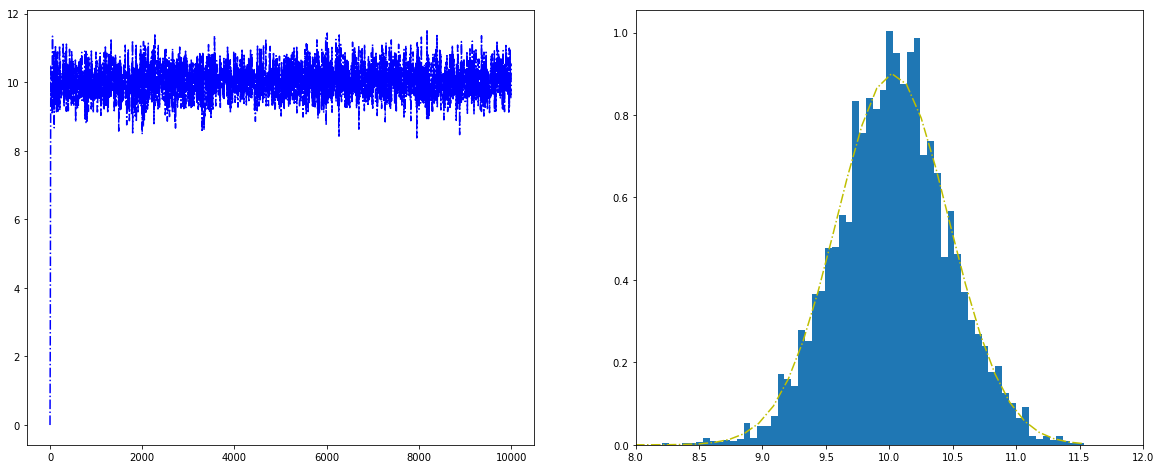

In [13]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.plot(theta_v,'b-.')
        
plt.subplot(1, 2, 2)
#bins = np.arange(0, S, 10) 
plt.hist(theta_v, density=True,bins='auto')
x = np.linspace(min(theta_v),max(theta_v),100) 
y = norm.pdf(x,mu_n,np.sqrt(t2_n))
plt.plot(x,y,'y-.')
plt.xlim(right=12)  # adjust the right leaving left unchanged
plt.xlim(left=8)  # adjust the left leaving right unchanged
plt.show()